### Start a spark session

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

25/03/20 09:55:23 WARN Utils: Your hostname, MacBook-Pro-von-Henri.local resolves to a loopback address: 127.0.0.1; using 10.51.3.132 instead (on interface en0)
25/03/20 09:55:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/henribreuer/anaconda3/envs/start-belimo/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/henribreuer/.ivy2/cache
The jars for the packages stored in: /Users/henribreuer/.ivy2/jars
io.delta#delta-sharing-spark_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-7aea041e-8cc5-4099-b961-2ea5abd1bb43;1.0
	confs: [default]
	found io.delta#delta-sharing-spark_2.12;3.3.0 in central
	found io.delta#delta-spark_2.12;3.3.0 in central
	found io.delta#delta-storage;3.3.0 in central
	found org.antlr#antlr4-runtime;4.9.3 in central
	found io.delta#delta-sharing-client_2.12;1.2.2 in central
	found org.apache.httpcomponents#httpclient;4.5.14 in central
	found org.apache.httpcomponents#httpcore;4.4.16 in central
	found commons-logging#commons-logging;1.2 in local-m2-cache
	found commons-codec#commons-codec;1.11 in local-m2-cache
:: resolution report :: resolve 633ms :: artifacts dl 71ms
	:: modules in use:
	commons-codec#commons-codec;1.11 from local-m2-cache in [default]
	commons-logging#commons-logging;1.2 from loc

### List Tables
Use the provided config

In [5]:
import delta_sharing
config = "config.share"
client = delta_sharing.SharingClient(config)
client.list_all_tables()

[Table(name='ev3_device_data', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='cc_api_logs', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='ev3_dataprofile', share='start_hack_2025', schema='start_hack_2025')]

### Table 1
Energyvalve 3 dataprofile describing the datapoints found in the device data table.

In [22]:
from pyspark.sql.functions import col
device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id))

dataframe = df.toPandas()
dataframe

25/03/20 13:07:19 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_d14bc553e654be500c03dfa48b09e97bccc1f39ed45dec95f20be9d8b267d579/_delta_log/00000000000000000000.json.
25/03/20 13:07:19 WARN DeltaSharingUtils: Found and removing existing block for test_delta-sharing-log:/config.share%23start_hack_2025.start_hack_2025.ev3_device_data_d14bc553e654be500c03dfa48b09e97bccc1f39ed45dec95f20be9d8b267d579/_delta_log.
ERROR:root:KeyboardInterrupt while sending command.                (0 + 0) / 50]
Traceback (most recent call last):
  File "/Users/henribreuer/anaconda3/envs/start-belimo/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/Users/henribreuer/anaconda3/envs/start-belimo/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])


KeyboardInterrupt: 

In [17]:
dataframe.to_excel("ev3_dataprofile.xlsx", index=False)

### Table 2
Energyvalve 3 device data. **Big data** list of timeseries samples for devices. Devices are differentiated by the **device_id** column.

In [2]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(3000)
device_data = df.toPandas()

25/03/20 09:55:50 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [3]:
device_data.head(10)

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-09 11:40:34.098,2019-06-09 11:38:32.312,2019,201906,20190609,2019-06-09_09.gz,349.924869,323.425260,...,10.0,0.0,91.900002,2,0.0,26.499609,4.940656e-324,2278.438304,9454.135186,NaN
1,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-19 01:18:23.274,2019-06-19 01:17:21.806,2019,201906,20190618,2019-06-18_23.gz,349.945812,323.440885,...,5.0,0.0,19.700001,2,0.0,26.504926,4.940656e-324,2508.085700,10513.017983,NaN
2,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 05:36:49.933,2019-06-17 05:33:48.073,2019,201906,20190617,2019-06-17_03.gz,351.181414,324.487760,...,5.0,0.0,31.400000,2,0.0,26.693653,1.361569e-04,2484.714193,35993.262013,NaN
3,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 10:18:08.063,2019-06-17 10:14:02.385,2019,201906,20190617,2019-06-17_08.gz,351.181414,324.503385,...,5.0,0.0,90.000000,2,0.0,26.678028,6.197484e-05,2489.384833,36060.931995,NaN
4,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 04:22:01.103,2019-06-08 04:19:29.379,2019,201906,20190608,2019-06-08_02.gz,349.935340,323.427865,...,5.0,0.0,25.500000,2,0.0,26.507476,4.940656e-324,2247.120865,9321.962749,NaN
5,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 10:53:47.489,2019-06-08 10:49:45.524,2019,201906,20190608,2019-06-08_08.gz,349.945812,323.456510,...,5.0,0.0,24.100000,2,0.0,26.489301,4.940656e-324,2253.625341,9350.065914,NaN
6,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-27 16:35:49.321,2019-06-27 16:32:26.767,2019,201906,20190627,2019-06-27_14.gz,349.953665,323.487760,...,5.0,0.0,9.500000,2,0.0,26.465905,4.940656e-324,2715.337325,11378.038000,NaN
7,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-28 03:46:34.775,2019-06-28 03:42:25.390,2019,201906,20190628,2019-06-28_01.gz,349.961518,323.466927,...,5.0,4.0,7.900000,2,0.0,26.494591,4.940656e-324,2726.503613,11423.259298,NaN
8,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-22 22:53:57.217,2019-06-22 22:50:55.169,2019,201906,20190622,2019-06-22_20.gz,349.935340,323.435677,...,10.0,0.0,33.500000,2,0.0,26.499663,4.940656e-324,2601.645109,10900.575603,NaN
9,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-18 15:10:53.847,2019-06-18 15:06:21.799,2019,201906,20190618,2019-06-18_13.gz,351.212827,324.534635,...,10.0,0.0,82.099998,2,0.0,26.678192,8.184905e-05,2518.257048,36479.243997,NaN


In [5]:
device_data["device_id"].unique()

array(['14e5bc06-9e32-4938-96df-82a070581e7d',
       '15cbf304-2834-4523-81d1-45c0bbc0f849'], dtype=object)

In [6]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")

# Get row count efficiently
row_count = df.count()
print(f"Total rows in dataset: {row_count}")

Total rows in dataset: 1464878868


In [7]:
unique_device_ids = df.select("device_id").distinct()
unique_device_ids.show(10)


+--------------------+
|           device_id|
+--------------------+
|26245f9f-8f9f-41b...|
|25ff3a33-6eba-423...|
|5dd3b941-aab6-44d...|
|96e6013a-9e90-4db...|
|968cc402-586d-4d4...|
|25f08a63-be6a-430...|
|c6569cbb-ab19-41b...|
|277ebacd-749c-4f9...|
|c6893e87-1c36-4dd...|
|1cd9e95f-7338-4b7...|
+--------------------+
only showing top 10 rows



In [12]:
unique_device_ids.count()

52424

In [13]:
# output first 100 device ids as list
device_id_list = unique_device_ids.limit(100).toPandas()["device_id"].to_list()

In [14]:
device_id_list

['26245f9f-8f9f-41b8-90bc-fa47640395f2',
 '25ff3a33-6eba-4238-9b8f-c0dea3f2e2c3',
 '5dd3b941-aab6-44de-bdb6-b5e82026cc54',
 '96e6013a-9e90-4dbd-9070-d6b4732f42b8',
 '968cc402-586d-4d47-ba8b-97c065762d0d',
 '25f08a63-be6a-430f-aa10-1f80af9450f7',
 'c6569cbb-ab19-41bd-97b8-4a60651ab3b4',
 '277ebacd-749c-4f9c-9a6f-43b871ec1e5d',
 'c6893e87-1c36-4dd5-a412-42fe04dd2054',
 '1cd9e95f-7338-4b7a-ade9-07d6d10d6fe9',
 '1d0d2869-41d3-4bbc-aa6a-6bb5b3b7e958',
 '1d3f72a5-6b6f-48aa-85b6-099ee2f6521d',
 'c9be13ef-db36-4a8e-ba91-87d226345cee',
 '1c3b788f-55f3-4be4-ba52-0a9c63014836',
 'bdfb474b-db7c-4ee9-8c06-dfe29a870e3f',
 '1c76dc41-d7c4-4c34-94e4-9d4285c4cbfe',
 'f2b9c3cd-04de-4c7d-a46b-f1d60eaac900',
 'b277316c-1e6e-4893-9206-3c580ac1e677',
 'e2c21321-36cb-43bc-a831-a5c390aa8a3c',
 'dcab0762-b0d9-4b86-8038-2c8cfc5f20be',
 'e2aef88e-ca82-4be1-a68a-39a4634fee57',
 'a196e561-3f4a-4031-b1f2-3bc96a39cf87',
 'f9f5777e-985f-4642-9bd6-869bf5fa7b54',
 'b2cd6c04-53ec-4265-83c2-304b8feef4ae',
 'db693a87-a33a-

In [29]:
x = dataframe["name"].to_list()
x.sort()
x


['AbsFlow_Fb_m3s',
 'AbsPower_Fb_W',
 'Act_Dir_Chngs_Counts',
 'Act_End_Hit_Counts',
 'Act_total_travel_fraction',
 'Active_Time_h',
 'Active_dT_Manager_total_h',
 'CloudLiveHours',
 'ControlMode_Write',
 'Cooling_E_J',
 'DDC_BUS_Sp_Write',
 'DDC_Sp_Rel',
 'DDC_Sp_V',
 'DN_Selection_Write',
 'DN_Size',
 'DeltaT_K',
 'DeltaT_Limitation_Write',
 'Error_Status_Cloud',
 'Flow_Volume_Cooling_total_m3',
 'Flow_Volume_Heating_total_m3',
 'Flow_Volume_total_m3',
 'Full_Load_h',
 'Glycol_Concentration_Rel',
 'Heating_E_J',
 'InstallationPosition_Write',
 'LoopSim_En_B',
 'Lower_Control_Band_4_Flow',
 'OpMode_Err_Override_included_raw_value',
 'OperatingHours',
 'Operating_Time_h_Research',
 'Override_Write',
 'Part_Load_h',
 'Pmax_Rel_Write',
 'RelFlow_Fb_Rel2Vmax',
 'RelPos_Fb',
 'RelPos_Sp',
 'RelPower_Fb_Rel2Pmax',
 'Sequence_Ste',
 'SpDeltaT_K_Write',
 'SpDeltaT_applied_K',
 'SpFlow_DeltaT_lmin_Write',
 'SpSource_Write',
 'Standby_dT_Manager_total_h',
 'Start_And_Stop_Ratio_Rel',
 'Steady_S

In [32]:
b = list(device_data.columns)
b.sort()
b

['AbsFlow_Fb_m3s',
 'AbsPower_Fb_W',
 'Active_dT_Manager_total_h',
 'ControlMode_Write',
 'Cooling_E_J',
 'DDC_BUS_Sp_Write',
 'DDC_Sp_Rel',
 'DDC_Sp_V',
 'DN_Size',
 'DeltaT_K',
 'DeltaT_Limitation_Write',
 'Error_Status_Cloud',
 'Flow_Volume_total_m3',
 'Glycol_Concentration_Rel',
 'Heating_E_J',
 'InstallationPosition_Write',
 'OperatingHours',
 'Override_Write',
 'Pmax_Rel_Write',
 'RelFlow_Fb_Rel2Vmax',
 'RelPos_Fb',
 'RelPower_Fb_Rel2Pmax',
 'SpDeltaT_K_Write',
 'SpDeltaT_applied_K',
 'SpFlow_DeltaT_lmin_Write',
 'T1_remote_K',
 'T2_embeded_K',
 'Vmax_Rel_Write',
 'Y3AnalogInputValue',
 'cloud_received_time',
 'dT_Manager_Ste',
 'dataprofile_id',
 'device_id',
 'influx_migration_source_filename',
 'sample_time',
 'year',
 'year_month',
 'year_month_day']

In [35]:
# print all columns that are only in x
set(x) - set(b)

{'Act_Dir_Chngs_Counts',
 'Act_End_Hit_Counts',
 'Act_total_travel_fraction',
 'Active_Time_h',
 'CloudLiveHours',
 'DN_Selection_Write',
 'Flow_Volume_Cooling_total_m3',
 'Flow_Volume_Heating_total_m3',
 'Full_Load_h',
 'LoopSim_En_B',
 'Lower_Control_Band_4_Flow',
 'OpMode_Err_Override_included_raw_value',
 'Operating_Time_h_Research',
 'Part_Load_h',
 'RelPos_Sp',
 'Sequence_Ste',
 'SpSource_Write',
 'Standby_dT_Manager_total_h',
 'Start_And_Stop_Ratio_Rel',
 'Steady_State_B',
 'Upper_Control_Band_4_Flow',
 'V_Fb_Rel_2_Vnom',
 'V_Sp_Rel_2_Vnom',
 'ValveType',
 'Vmin_Ctrl_En_Write',
 'dT_Manager_TurnedOff_total_h',
 'dT_avg_last_month_K',
 'dT_lower_dBLim_K',
 'dT_movavg_1h1Update_K',
 'dT_upper_dBLim_K'}

In [36]:
# print all columns that are only in b
set(b) - set(x)

{'Y3AnalogInputValue',
 'cloud_received_time',
 'dataprofile_id',
 'device_id',
 'influx_migration_source_filename',
 'sample_time',
 'year',
 'year_month',
 'year_month_day'}

### Plot
Heat Exchanger Characteristic

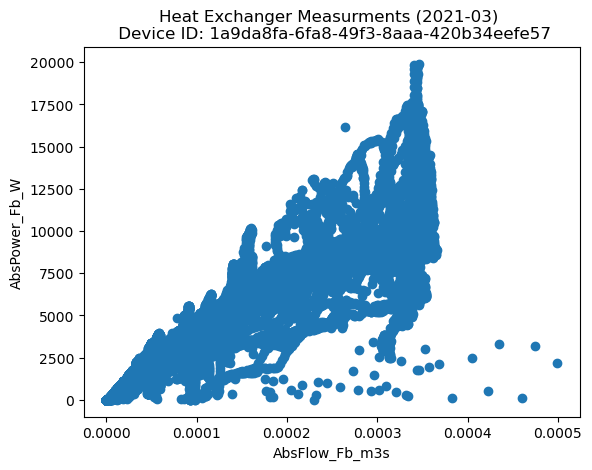

In [17]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202103"
x = "AbsFlow_Fb_m3s"
y = "AbsPower_Fb_W"
df_data = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id) & (col("year_month") == year_month)).toPandas()
year_month = year_month[:4] + '-' + year_month[4:]
plt.scatter(df_data[x], df_data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Heat Exchanger Measurments ({year_month}) \n Device ID: {device_id}")
plt.show()

### Table 3
Cloud api logs describing interactions with our cloud.

In [10]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(3)
df.toPandas()

,api,class,cloudEnv,component,correlationId,developmentDevice,durationInMs,host,httpStatus,logEnv,...,principal,requestId,requestURI,requestURL,signature,signatureFull,signatureId,threadName,userAgent,timestamp
0,device,None,production,core-cloud,CCB:9ae22714-7c8c-4490-8f07-d5fd7793b6cf,NaN,119,logsearch-lifeline-agent-stateful-0.logsearch-...,401,production,...,None,a3818cc09b0af2d7c72134ca5fa93eda,/device-api/registration,https://connect.g2bcc.com/device-api/registration,None,None,None,http-nio-8080-exec-29,"sharedlogic/3.22.5-0 (bsp 10.8.0-0, model 1.2....",2025-01-16 08:45:23.365
1,device,DeviceApiV2DeviceController,production,core-cloud,CCB:fc660e65-b629-4ca1-9adc-ac91cd3fb090,NaN,24,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,4d284824-f2dc-4e47-9641-9c4bd115fbab,db0062793fb9ee45787e4588891f15dc,/device-api/v2/devices/8acbcbb2-0649-429b-b09b...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-93,,2025-01-16 08:45:23.450
2,device,DeviceApiV2DeviceController,production,core-cloud,CCB:6cb197c0-6be1-4e49-82f4-90539ab6ded2,NaN,23,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,d68a34f0-379c-4534-84e9-0278b8539c11,93df335640a41a3e4b1ecc00a4e58304,/device-api/v2/devices/fec4211e-1d9a-41c8-820d...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-146,,2025-01-16 08:45:23.452


In [40]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(3000)
device_data = df.toPandas()

In [41]:
device_data.describe()

,cloud_received_time,sample_time,T1_remote_K,T2_embeded_K,RelFlow_Fb_Rel2Vmax,RelPower_Fb_Rel2Pmax,AbsFlow_Fb_m3s,AbsPower_Fb_W,Heating_E_J,Glycol_Concentration_Rel,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
count,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,...,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.000000,3.000000e+03,3000.000000,3000.000000,0.0
mean,2019-06-18 03:54:24.759784448,2019-06-18 03:52:03.722100736,350.618156,324.017128,82.222152,3197.596325,0.002768,304989.705884,0.0,0.0,...,7.673333,0.122667,51.675500,2.0,0.0,26.601028,3.056657e-05,2497.675858,24526.130890,NaN
min,2019-06-07 11:28:12.050000,2019-06-07 11:27:09.679000,349.922251,323.399219,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,5.000000,0.000000,0.000000,2.0,0.0,26.426774,4.940656e-324,2230.310334,9246.188480,NaN
25%,2019-06-10 15:08:05.989250048,2019-06-10 15:08:03.719749120,349.943194,323.446094,42.446413,1769.773691,0.001556,170502.106530,0.0,0.0,...,5.000000,0.000000,26.675001,2.0,0.0,26.499718,4.940656e-324,2308.565149,10501.205423,NaN
50%,2019-06-18 21:04:43.213500160,2019-06-18 21:01:56.467000064,351.176178,324.485156,100.613720,4438.479273,0.004025,443804.302423,0.0,0.0,...,10.000000,0.000000,52.599998,2.0,0.0,26.675438,6.400922e-27,2512.673030,32888.222254,NaN
75%,2019-06-23 11:07:17.809999872,2019-06-23 11:03:29.817500160,351.191885,324.503385,134.151626,4442.415693,0.004025,444023.612629,0.0,0.0,...,10.000000,0.000000,75.300003,2.0,0.0,26.688540,6.835123e-09,2621.018975,37423.514964,NaN
max,2019-06-30 16:42:57.080000,2019-06-30 16:39:55.093000,351.223298,324.534635,134.151626,4951.879210,0.004040,445669.128919,0.0,0.0,...,10.000000,4.000000,100.000000,2.0,0.0,26.717186,2.405279e-03,2807.650556,40672.113677,NaN
std,NaN,NaN,0.622385,0.527399,47.822677,1780.987107,0.001535,169490.063985,0.0,0.0,...,2.494400,0.689767,28.644056,0.0,0.0,0.095802,1.388262e-04,175.030499,13254.078725,NaN
